# Module 4 - Algo Trading using Classification


   ### Welcome to the Answer notebook for Module 4 ! 
Make sure that you've submitted the module 3 notebook and unlocked Module 4 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 4.1 
Import the csv file of the stock which contained the Bollinger columns as well.



In [49]:
import pandas as pd
import numpy as np
d=pd.read_csv('week3.csv')
d.head()


,Unnamed: 0,Unnamed: 0.1,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,...,Check,Month,Year,Day_Perc_Change,Trend,moving_av,std_dev,upper,lower,middle
0,13,13,HEROMOTOCO,EQ,2017-06-01,3745.45,3742.00,3815.00,3708.80,3730.00,...,ok,6,2017,-0.323059,Slight or No change,3557.767857,69.063076,3695.894008,3488.704782,3557.767857
1,14,14,HEROMOTOCO,EQ,2017-06-02,3733.35,3758.80,3857.50,3750.00,3849.95,...,ok,6,2017,3.117843,Among top gainers,3581.646429,92.368717,3766.383863,3489.277711,3581.646429
2,15,15,HEROMOTOCO,EQ,2017-06-05,3849.75,3850.00,3880.55,3821.25,3830.55,...,ok,6,2017,-0.384441,Slight or No change,3597.042857,103.329785,3803.702428,3493.713072,3597.042857
3,16,16,HEROMOTOCO,EQ,2017-06-06,3834.95,3844.00,3844.00,3785.05,3803.15,...,ok,6,2017,-0.912659,Slight negative,3608.042857,103.578048,3815.198953,3504.464809,3608.042857
4,17,17,HEROMOTOCO,EQ,2017-06-07,3799.95,3803.85,3856.05,3803.85,3841.00,...,ok,6,2017,1.139489,Positive,3625.985714,102.854643,3831.694999,3523.131072,3625.985714


In [50]:
d['Close Price'].head()

0    3613.35
1    3729.75
2    3714.95
3    3679.95
4    3723.25
Name: Close Price, dtype: float64

In [51]:

df = d[['Close Price','middle', 'upper', 'lower']].copy()
df.tail()


,Close Price,middle,upper,lower
476,2407.35,2548.935714,2707.693102,2469.557020
477,2379.70,2538.921429,2686.692354,2465.035966
478,2417.75,2527.282143,2642.498433,2469.673998
479,2387.30,2510.685714,2605.319478,2463.368832
480,2390.75,2494.200000,2577.661439,2452.469281


In [48]:
df.iloc[0,0]


3613.35

### Query 4.1a 

Create a new column 'Call' , whose entries are - 

>'Buy' if the stock price is below the lower Bollinger band 

>'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 

>'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 

>'Short' if the stock price is above the upper Bollinger band




In [54]:
call=[]
for i in range (0,481):
    if  df.iloc[i,0] < df.iloc[i,3]:
        call.append('Buy')
    elif df.iloc[i,0] > df.iloc[i,2] :
        call.append('Short')
    elif df.iloc[i,3]< df.iloc[i,0] < df.iloc[i,1]:
        call.append('Hold Buy')
    elif df.iloc[i,1]< df.iloc[i,0] < df.iloc[i,2]:
        call.append('Hold short')
#print(call)
df['Call']=call
df.head(20)
    

,Close Price,middle,upper,lower,Call
0,3613.35,3557.767857,3695.894008,3488.704782,Hold short
1,3729.75,3581.646429,3766.383863,3489.277711,Hold short
2,3714.95,3597.042857,3803.702428,3493.713072,Hold short
3,3679.95,3608.042857,3815.198953,3504.464809,Hold short
4,3723.25,3625.985714,3831.694999,3523.131072,Hold short
5,3664.45,3641.185714,3831.869510,3545.843816,Hold short
6,3660.10,3656.732143,3816.985751,3576.605339,Hold short
7,3653.25,3670.178571,3809.538486,3600.498614,Hold Buy
8,3632.50,3683.385714,3789.248603,3630.454270,Hold Buy
9,3669.05,3695.042857,3775.408593,3654.859989,Hold Buy


In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [56]:
import sklearn 
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2)
print(train.shape)
print(test.shape)


(384, 5)
(97, 5)


In [58]:
x_train=train[['upper','middle','lower','Close Price']]
y_train=train[['Call']]
x_test=test[['upper','middle','lower','Close Price']]
y_test=test[['Call']]
x_train.head()
y_train.head()

,Call
400,Buy
185,Hold short
368,Hold Buy
280,Buy
158,Buy


In [59]:

knn=  KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(accuracy_score(y_pred, y_test))
print(y_pred)


0.8041237113402062
['Hold Buy' 'Hold short' 'Hold short' 'Buy' 'Buy' 'Buy' 'Hold short'
 'Hold Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Hold short' 'Buy' 'Buy' 'Hold Buy'
 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Hold short' 'Hold Buy' 'Buy'
 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Hold Buy' 'Buy' 'Buy'
 'Buy' 'Hold short' 'Buy' 'Hold short' 'Hold short' 'Hold Buy' 'Buy' 'Buy'
 'Hold short' 'Hold Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Hold short'
 'Buy' 'Hold Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Hold Buy' 'Hold short' 'Buy'
 'Hold short' 'Hold short' 'Hold short' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy'
 'Hold Buy' 'Hold short' 'Hold short' 'Hold short' 'Buy' 'Hold Buy'
 'Hold short' 'Buy' 'Hold short' 'Buy' 'Buy' 'Hold short' 'Buy'
 'Hold short' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Hold Buy' 'Hold short'
 'Hold Buy' 'Hold short' 'Buy' 'Buy']


/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
nb=  GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print(accuracy_score(y_pred, y_test))
print(y_pred)


0.5154639175257731
['Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy'
 'Hold Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy'
 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy'
 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy'
 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy'
 'Buy' 'Buy' 'Hold Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy'
 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy'
 'Hold Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Hold Buy' 'Buy' 'Buy' 'Buy'
 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy']


/opt/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
dct=  DecisionTreeClassifier()
dct.fit(x_train,y_train)
y_pred=dct.predict(x_test)
print(y_pred)
print(accuracy_score(y_pred, y_test))

['Hold Buy' 'Hold short' 'Hold short' 'Buy' 'Buy' 'Buy' 'Hold short'
 'Hold Buy' 'Hold short' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Hold Buy'
 'Buy' 'Buy' 'Buy' 'Hold Buy' 'Hold Buy' 'Buy' 'Buy' 'Hold short'
 'Hold short' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Hold Buy' 'Hold Buy' 'Buy'
 'Buy' 'Hold Buy' 'Buy' 'Buy' 'Buy' 'Hold short' 'Buy' 'Hold short'
 'Hold short' 'Hold Buy' 'Buy' 'Buy' 'Hold short' 'Hold Buy' 'Buy' 'Buy'
 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Hold Buy' 'Hold Buy' 'Buy'
 'Hold Buy' 'Hold Buy' 'Hold short' 'Buy' 'Hold Buy' 'Hold short'
 'Hold short' 'Buy' 'Buy' 'Buy' 'Hold Buy' 'Hold Buy' 'Buy' 'Hold short'
 'Hold short' 'Hold short' 'Buy' 'Buy' 'Hold short' 'Buy' 'Buy' 'Buy'
 'Buy' 'Hold short' 'Buy' 'Hold short' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy' 'Buy'
 'Hold short' 'Hold short' 'Hold short' 'Buy' 'Buy' 'Hold Buy']
0.7422680412371134


# Conclusion: So knn best fits the problem with 0.8 accuracy

# Problem 2

In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('FORTIS.csv')
data.head()
data.size
data.shape

(495, 15)

In [2]:
a=data[['Open Price','Close Price','High Price','Low Price']].copy()
a.head()

,Open Price,Close Price,High Price,Low Price
0,208.40,205.25,209.65,204.05
1,206.25,207.90,209.45,205.45
2,208.00,205.90,210.80,204.90
3,204.00,196.85,205.25,195.00
4,197.80,203.55,204.90,196.45


In [3]:
a['per_oc']=((a['Open Price']-a['Close Price'])/a['Close Price'])*100
a.head()

,Open Price,Close Price,High Price,Low Price,per_oc
0,208.40,205.25,209.65,204.05,1.534714
1,206.25,207.90,209.45,205.45,-0.793651
2,208.00,205.90,210.80,204.90,1.019913
3,204.00,196.85,205.25,195.00,3.632207
4,197.80,203.55,204.90,196.45,-2.824859


In [4]:
a['per_hl']=((a['High Price']-a['Low Price'])/a['Low Price'])*100
a.head()

,Open Price,Close Price,High Price,Low Price,per_oc,per_hl
0,208.40,205.25,209.65,204.05,1.534714,2.744425
1,206.25,207.90,209.45,205.45,-0.793651,1.946946
2,208.00,205.90,210.80,204.90,1.019913,2.879453
3,204.00,196.85,205.25,195.00,3.632207,5.256410
4,197.80,203.55,204.90,196.45,-2.824859,4.301349


In [5]:
a['per_cp']=a['Close Price'].pct_change()
a.head()

,Open Price,Close Price,High Price,Low Price,per_oc,per_hl,per_cp
0,208.40,205.25,209.65,204.05,1.534714,2.744425,NaN
1,206.25,207.90,209.45,205.45,-0.793651,1.946946,0.012911
2,208.00,205.90,210.80,204.90,1.019913,2.879453,-0.009620
3,204.00,196.85,205.25,195.00,3.632207,5.256410,-0.043953
4,197.80,203.55,204.90,196.45,-2.824859,4.301349,0.034036


In [6]:
a['Rl_m_cp']=a.per_cp.rolling(5).mean()

a.head(10)

,Open Price,Close Price,High Price,Low Price,per_oc,per_hl,per_cp,Rl_m_cp
0,208.40,205.25,209.65,204.05,1.534714,2.744425,NaN,NaN
1,206.25,207.90,209.45,205.45,-0.793651,1.946946,0.012911,NaN
2,208.00,205.90,210.80,204.90,1.019913,2.879453,-0.009620,NaN
3,204.00,196.85,205.25,195.00,3.632207,5.256410,-0.043953,NaN
4,197.80,203.55,204.90,196.45,-2.824859,4.301349,0.034036,NaN
5,206.00,194.80,206.25,193.50,5.749487,6.589147,-0.042987,-0.009923
6,195.50,196.55,199.00,191.20,-0.534215,4.079498,0.008984,-0.010708
7,197.65,194.35,200.20,192.50,1.697968,4.000000,-0.011193,-0.011023
8,192.50,202.55,203.50,192.10,-4.961738,5.934409,0.042192,0.006206
9,205.10,202.75,206.25,201.75,1.159063,2.230483,0.000987,-0.000403


In [7]:
a['Rl_std_cp']=a.per_cp.rolling(5).std()
a.head(10)

,Open Price,Close Price,High Price,Low Price,per_oc,per_hl,per_cp,Rl_m_cp,Rl_std_cp
0,208.40,205.25,209.65,204.05,1.534714,2.744425,NaN,NaN,NaN
1,206.25,207.90,209.45,205.45,-0.793651,1.946946,0.012911,NaN,NaN
2,208.00,205.90,210.80,204.90,1.019913,2.879453,-0.009620,NaN,NaN
3,204.00,196.85,205.25,195.00,3.632207,5.256410,-0.043953,NaN,NaN
4,197.80,203.55,204.90,196.45,-2.824859,4.301349,0.034036,NaN,NaN
5,206.00,194.80,206.25,193.50,5.749487,6.589147,-0.042987,-0.009923,0.034297
6,195.50,196.55,199.00,191.20,-0.534215,4.079498,0.008984,-0.010708,0.033683
7,197.65,194.35,200.20,192.50,1.697968,4.000000,-0.011193,-0.011023,0.033678
8,192.50,202.55,203.50,192.10,-4.961738,5.934409,0.042192,0.006206,0.034641
9,205.10,202.75,206.25,201.75,1.159063,2.230483,0.000987,-0.000403,0.030960


In [34]:
Actions=[]
for i in range(0,494):
    x=a.iloc[i,1]
    y=a.iloc[i+1,1]
    if y>x:
        Actions.append(1)
    else:
        Actions.append(-1)
#print(Actions) 
Actions.append(0)
a['Actions']=Actions
a.head()

,Open Price,Close Price,High Price,Low Price,per_oc,per_hl,per_cp,Rl_m_cp,Rl_std_cp,cp_diff,actions,new_act,Act,Actions
0,208.40,205.25,209.65,204.05,1.534714,2.744425,NaN,NaN,NaN,NaN,1,-1,1,1
1,206.25,207.90,209.45,205.45,-0.793651,1.946946,0.012911,NaN,NaN,2.65,-1,-1,1,-1
2,208.00,205.90,210.80,204.90,1.019913,2.879453,-0.009620,NaN,NaN,-2.00,1,-1,1,-1
3,204.00,196.85,205.25,195.00,3.632207,5.256410,-0.043953,NaN,NaN,-9.05,1,-1,1,1
4,197.80,203.55,204.90,196.45,-2.824859,4.301349,0.034036,NaN,NaN,6.70,-1,-1,1,-1


In [41]:
b= a[['Close Price','per_oc','per_hl', 'Rl_m_cp', 'Rl_std_cp','Actions']].copy()
c=b.dropna()
c.head(10)


,Close Price,per_oc,per_hl,Rl_m_cp,Rl_std_cp,Actions
5,194.80,5.749487,6.589147,-0.009923,0.034297,1
6,196.55,-0.534215,4.079498,-0.010708,0.033683,-1
7,194.35,1.697968,4.000000,-0.011023,0.033678,1
8,202.55,-4.961738,5.934409,0.006206,0.034641,1
9,202.75,1.159063,2.230483,-0.000403,0.030960,-1
10,196.10,2.192759,4.181632,0.001634,0.027611,1
11,198.15,-1.589705,3.537310,0.001928,0.027717,-1
12,195.15,1.895977,3.186023,0.001139,0.028235,1
13,198.35,-1.235190,2.613374,-0.004020,0.020021,-1
14,192.95,3.679710,5.136897,-0.009662,0.022122,1


In [42]:
import sklearn 
from sklearn.model_selection import train_test_split
train,test=train_test_split(c,test_size=0.2)
print(train.shape)
print(test.shape)


(392, 6)
(98, 6)


In [43]:
x_train=train[['per_oc','per_hl','Rl_m_cp','Rl_std_cp']]
y_train=train[['Actions']]
x_test=test[['per_oc','per_hl','Rl_m_cp','Rl_std_cp']]
y_test=test[['Actions']]
x_train.head()
y_train.head()

,Actions
285,1
366,-1
126,-1
143,1
54,-1


In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc=  RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(y_pred)
print(accuracy_score(y_pred, y_test))

[-1 -1  1  1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1
  1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1  1
 -1 -1 -1  1 -1  1 -1  1 -1 -1  1 -1  1  1  1 -1 -1  1 -1 -1  1  1 -1 -1
 -1 -1  1 -1  1  1  1 -1 -1  1  1 -1 -1  1 -1  1  1 -1  1 -1 -1 -1  1 -1
 -1 -1]
0.4897959183673469


/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


# Using RandomForest WE get an Accuracy of 0.48

# Graph

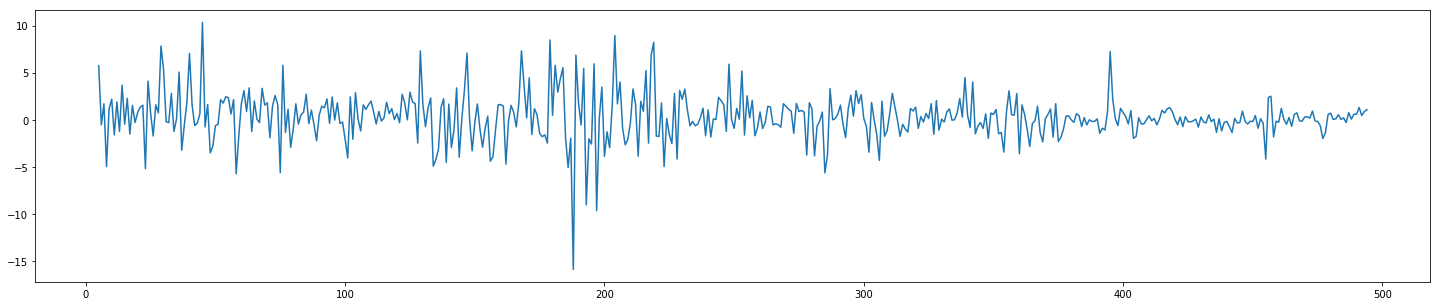

In [65]:
c['per_oc'].plot.line(figsize=(25,5))